In [2]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [3]:
dataset = load_dataset("imdb")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
dataset["train"][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
dataset["train"][0]["text"][:500]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attent'

In [6]:
word_lengths = [len(text.split()) for text in dataset["train"]["text"]]

np.mean(word_lengths), np.median(word_lengths), np.percentile(word_lengths, [90, 95, 99])

(np.float64(233.7872), np.float64(174.0), array([458., 598., 913.]))

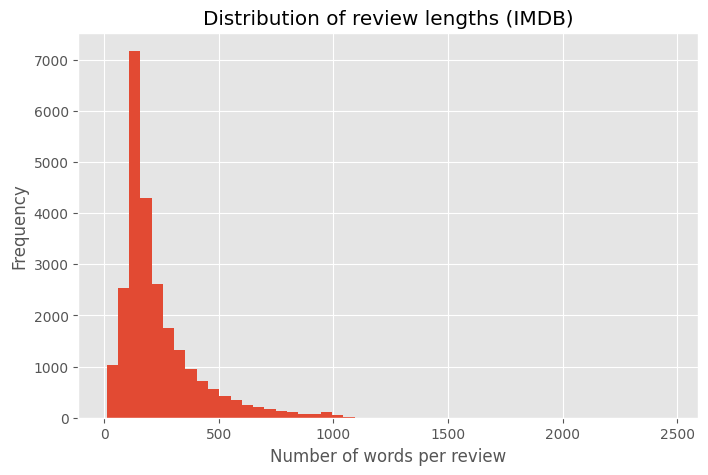

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(word_lengths, bins=50)
plt.xlabel("Number of words per review")
plt.ylabel("Frequency")
plt.title("Distribution of review lengths (IMDB)")
plt.show()

In [8]:
labels = dataset["train"]["label"]
np.bincount(labels)

array([12500, 12500])

## *Summary*
- The IMDB dataset consists of long, unstructured movie reviews.
- Class distribution is perfectly balanced.
- Most reviews exceed the maximum sequence length supported by transformer models.
- Based on the length distribution, a maximum sequence length of 128 tokens was selected as a trade-off between performance and computational efficiency.